In [0]:
!ls -ltr

total 3104761
-rw------- 1 root root 1023330403 Jun  7 18:17 2018-10_RAMP_all_page-clicks.csv
-rw------- 1 root root   69104904 Jun  7 18:21 2018-10_RAMP_all_country-device-info.csv
-rw------- 1 root root 2086838488 Jun  7 20:19 2018-08_RAMP_all.csv


In [0]:
!head 2018-08_RAMP_all.csv

citableContent,clickThrough,clicks,country,date,device,impressions,index,position,query,url
No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,4.0,,http://cdm16918.contentdm.oclc.org/cdm/landingpage/collection/myfirst
No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,133.0,,http://cdm16918.contentdm.oclc.org/cdm/ref/collection/p16918coll1/id/212
No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,5.0,,http://cdm16918.contentdm.oclc.org/cdm/search
No,0.0,0.0,tza,2018-08-05,MOBILE,1.0,washburn,15.0,,http://cdm16918.contentdm.oclc.org/cdm/singleitem/collection/myfirst/id/2/rec/9
No,0.0,0.0,usa,2018-08-07,DESKTOP,1.0,washburn,10.0,,http://cdm16918.contentdm.oclc.org/cdm/landingpage/collection/myfirst
No,0.0,0.0,usa,2018-08-07,DESKTOP,1.0,washburn,7.0,,http://cdm16918.contentdm.oclc.org/cdm/singleitem/collection/myfirst/id/2/rec/9
No,0.0,0.0,gbr,2018-08-01,DESKTOP,1.0,washburn,157.0,,http://cdm16918.contentdm.oclc.org/cdm/singleitem/collection/myfirst/id/20
Yes,0.0,0.0,usa,2018-08-02,DESKTOP,1.0,massey

It looks like the country_device_info and page-clicks are subset of the all.csv dataset. Therefore, Exploratory Data Analysis (EDA) will be performed on the all.csv file

Read the CSV file using Panda Data Frame library

In [0]:
import pandas as pd
ramp_all = pd.read_csv("2018-08_RAMP_all.csv")

In [0]:
ramp_all.describe()

,clickThrough,clicks,impressions,position,query
count,1.579440e+07,1.579440e+07,1.579440e+07,1.579440e+07,0.0
mean,2.160755e-02,4.446271e-02,1.821569e+00,5.694255e+01,NaN
std,1.313101e-01,3.071469e-01,5.789004e+00,8.010581e+01,NaN
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN
25%,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00,NaN
50%,0.000000e+00,0.000000e+00,1.000000e+00,2.950000e+01,NaN
75%,0.000000e+00,0.000000e+00,2.000000e+00,7.580000e+01,NaN
max,1.000000e+00,9.100000e+01,2.544000e+03,1.000000e+03,NaN


It looks like the query column does not have a correct number assigned on it. Let's check using the unique function

In [0]:
ramp_all["query"].unique()

array([nan])

Yes, there is no value assigned to the query column, maybe need more information about this... Ask Jonathan or Dr. Arlitsch.

Let us see what we have on the dataframe

In [0]:
ramp_all.head()

,citableContent,clickThrough,clicks,country,date,device,impressions,index,position,query,url
0,No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,4.0,NaN,http://cdm16918.contentdm.oclc.org/cdm/landing...
1,No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,133.0,NaN,http://cdm16918.contentdm.oclc.org/cdm/ref/col...
2,No,0.0,0.0,ind,2018-08-02,DESKTOP,1.0,washburn,5.0,NaN,http://cdm16918.contentdm.oclc.org/cdm/search
3,No,0.0,0.0,tza,2018-08-05,MOBILE,1.0,washburn,15.0,NaN,http://cdm16918.contentdm.oclc.org/cdm/singlei...
4,No,0.0,0.0,usa,2018-08-07,DESKTOP,1.0,washburn,10.0,NaN,http://cdm16918.contentdm.oclc.org/cdm/landing...


# Group the categorical fields

The ramp dataset has categorical columns that might be useful for the analysis. To have better understanding of the distribution for each categorical column, let's do group count and plot the histogram.

In [0]:
ramp_all.groupby("citableContent").count()

,clickThrough,clicks,country,date,device,impressions,index,position,query,url
citableContent,,,,,,,,,,
No,4795407,4795407,4795407,4795407,4795407,4795407,4795407,4795407,0,4795407
Yes,10998996,10998996,10998996,10998996,10998996,10998996,10998996,10998996,0,10998996


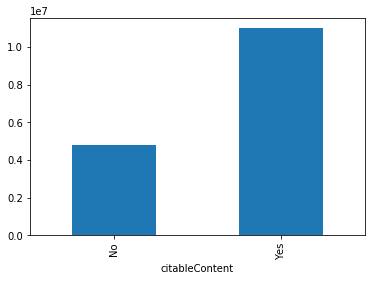

In [0]:
ramp_all.groupby("citableContent").count().iloc[:,0].plot("bar")

In [0]:
ramp_all.groupby("device").count()

,citableContent,clickThrough,clicks,country,date,impressions,index,position,query,url
device,,,,,,,,,,
DESKTOP,11904010,11904010,11904010,11904010,11904010,11904010,11904010,11904010,0,11904010
MOBILE,3472663,3472663,3472663,3472663,3472663,3472663,3472663,3472663,0,3472663
TABLET,417730,417730,417730,417730,417730,417730,417730,417730,0,417730


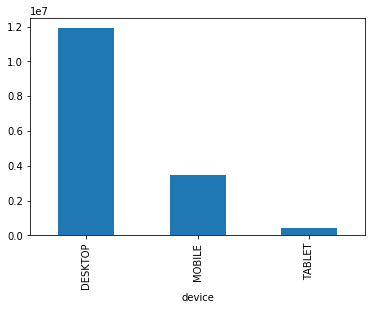

In [0]:
ramp_all.groupby("device").count().iloc[:,0].plot("bar")

In [0]:
ramp_all.groupby("index").count()

,citableContent,clickThrough,clicks,country,date,device,impressions,position,query,url
index,,,,,,,,,,
boston_u,648303,648303,648303,648303,648303,648303,648303,648303,0,648303
brock_u,37049,37049,37049,37049,37049,37049,37049,37049,0,37049
calgary,5479,5479,5479,5479,5479,5479,5479,5479,0,5479
caltech_authors,966307,966307,966307,966307,966307,966307,966307,966307,0,966307
caltech_thesis,406309,406309,406309,406309,406309,406309,406309,406309,0,406309
colorado,871253,871253,871253,871253,871253,871253,871253,871253,0,871253
epsilon,455366,455366,455366,455366,455366,455366,455366,455366,0,455366
epsilon_students,1087816,1087816,1087816,1087816,1087816,1087816,1087816,1087816,0,1087816
ifpri_rep,814939,814939,814939,814939,814939,814939,814939,814939,0,814939


In [0]:
ramp_all.groupby("index").count().iloc[:,0].sort_values(ascending=False)

index
um                       1558234
ut_austin                1272655
univ_kentucky            1158533
u_waterloo               1150829
epsilon_students         1087816
caltech_authors           966307
shareok                   879104
colorado                  871253
ifpri_rep                 814939
md_drum                   722374
mcmaster                  699458
boston_u                  648303
rutgers                   577325
new_mexico_dc             572740
unlv_digital              481061
epsilon                   455366
krex                      420571
caltech_thesis            406309
uni_laval                 342894
montana                   242489
md_soar                   165774
massey                    132170
swarthmore_inst-schol      84093
brock_u                    37049
swarthmore                 19377
nku                        13831
winnipeg                    8049
calgary                     5479
washburn                      21
Name: citableContent, dtype: int64

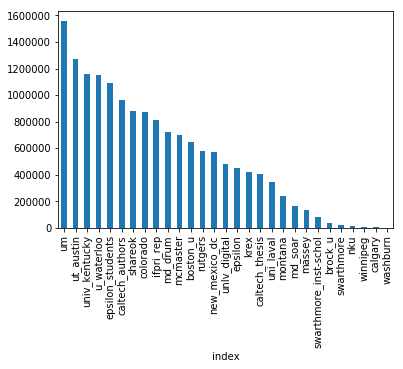

In [0]:
ramp_all.groupby("index").count().iloc[:,0].sort_values(ascending=False).plot("bar")

### Histogram for Numerical Values

position and number of click columns look interesting. Because they are numerical columns, let's plot histogram for these columns

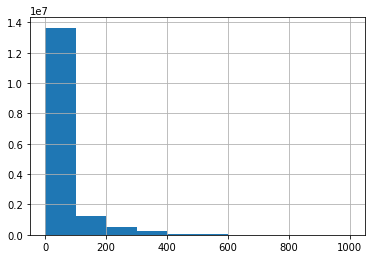

In [0]:
ramp_all.position.hist()

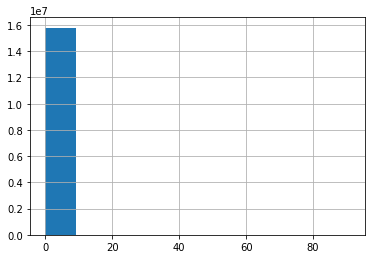

In [0]:
ramp_all.clicks.hist()

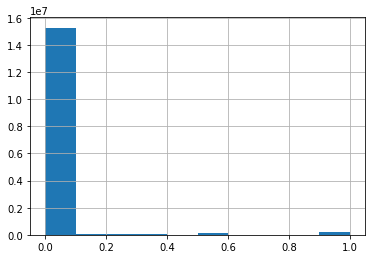

In [0]:
ramp_all.clickThrough.hist()

# Describe the correlation

Correlation between all numeric columns.
It looks like clicks and clickThrough has quite a strong positive correlation. Besides, impressions and clicks also have a positive correlation 

In [0]:
ramp_all.corr()

,clickThrough,clicks,impressions,position,query
clickThrough,1.000000,0.563978,0.006713,-0.092783,NaN
clicks,0.563978,1.000000,0.385436,-0.081941,NaN
impressions,0.006713,0.385436,1.000000,-0.029777,NaN
position,-0.092783,-0.081941,-0.029777,1.000000,NaN
query,NaN,NaN,NaN,NaN,NaN


# Group  URL

To see the favorite pages that get most of the visit on this log during period Aug 2018

In [0]:
ramp_visit = ramp_all.groupby("url").count()

In [0]:
ramp_visit.loc[:,["citableContent"]].sort_values("citableContent",ascending=False)

,citableContent
url,
http://www.ifpri.org/,7097
http://www.ifpri.org/topic/food-security,4781
https://deepblue.lib.umich.edu/data,4345
https://rucore.libraries.rutgers.edu/rutgers-lib/44747/TXT/3/,4040
https://www.ifpri.org/sites/default/files/ghi/2014/feature_1818.html,4040
http://www.ifpri.org/publication/global-hunger-index-interactive-map,3958
http://uknowledge.uky.edu/world_mexico_alebrijes/,3901
http://www.ifpri.org/blog/world-population-day-2017-ifpri-models-impact-population-growth-demand-food,3725
https://authors.library.caltech.edu/25034/,3719


Get the top 100

In [0]:
ramp_visit.loc[:,["citableContent"]].sort_values("citableContent",ascending=False).head(50)

,citableContent
url,
http://www.ifpri.org/,7097
http://www.ifpri.org/topic/food-security,4781
https://deepblue.lib.umich.edu/data,4345
https://rucore.libraries.rutgers.edu/rutgers-lib/44747/TXT/3/,4040
https://www.ifpri.org/sites/default/files/ghi/2014/feature_1818.html,4040
http://www.ifpri.org/publication/global-hunger-index-interactive-map,3958
http://uknowledge.uky.edu/world_mexico_alebrijes/,3901
http://www.ifpri.org/blog/world-population-day-2017-ifpri-models-impact-population-growth-demand-food,3725
https://authors.library.caltech.edu/25034/,3719


Question:

Do we have an id for each visit, so we can see if a visitor access the page multiple times to count a unique visitor for each page?